# Mandelbrot set

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import imageio.v2 as imageio
import base64
from IPython.display import display, Image as IPythonImage

In [2]:
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    if n == max_iter:
        return max_iter
    return n + 1 - np.log(np.log2(abs(z)))

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2])

# def plot_mandelbrot(xmin, xmax, ymin, ymax, max_iter=256, width=600, height=400):
#     img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
#     plt.figure(figsize=(10, 6))
#     plt.imshow(img, extent=(xmin, xmax, ymin, ymax), cmap="jet")  # prism, jet is also cool
#     plt.colorbar()
#     plt.show()

def plot_mandelbrot(xmin, xmax, ymin, ymax, max_iter=256, width=600, height=400):
    # Calculate zoom factor and adjust max_iter accordingly
    initial_zoom_width = 3.5  # Initial width of the view (full Mandelbrot set typically spans from about -2.5 to 1)
    current_zoom_width = xmax - xmin
    zoom_ratio = initial_zoom_width / current_zoom_width
    adjusted_max_iter = int(max_iter * np.log2(zoom_ratio + 1))

    img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, adjusted_max_iter)
    plt.figure(figsize=(10, 6))
    plt.imshow(img, extent=(xmin, xmax, ymin, ymax), cmap="jet", origin="lower")
    plt.colorbar()
    plt.show()

In [31]:
def create_zoom_gif(start_bounds, end_bounds, steps, output_gif, width=600, height=400, max_iter=256):
    if not os.path.exists('frames'):
        os.makedirs('frames')

    images = []
    for step in range(steps):
        xmin = np.linspace(start_bounds[0], end_bounds[0], steps)[step]
        xmax = np.linspace(start_bounds[1], end_bounds[1], steps)[step]
        ymin = np.linspace(start_bounds[2], end_bounds[2], steps)[step]
        ymax = np.linspace(start_bounds[3], end_bounds[3], steps)[step]

        frame_filename = f'frames/frame_{step:04d}.png'
        save_frame(xmin, xmax, ymin, ymax, frame_filename, max_iter, width, height)
        images.append(imageio.imread(frame_filename))

    # Ensure all images are the same size
    if len(set(img.shape for img in images)) != 1:
        uniform_size = (height, width)  # Expected dimensions
        images = [np.array(Image.fromarray(img).resize(uniform_size, Image.LANCZOS)) for img in images]

    # Increase duration to 0.5 seconds per frame
    imageio.mimsave(output_gif, images, duration=0.8, loop=0)

    # Clean up frames directory
    for frame_filename in os.listdir('frames'):
        os.remove(f'frames/{frame_filename}')
    os.rmdir('frames')

    # Display the GIF in the notebook as a base64 image for inline viewing
    with open(output_gif, 'rb') as f:
        gif_data = f.read()
        b64 = base64.b64encode(gif_data).decode('utf-8')
        display(IPythonImage(url=f"data:image/gif;base64,{b64}"))


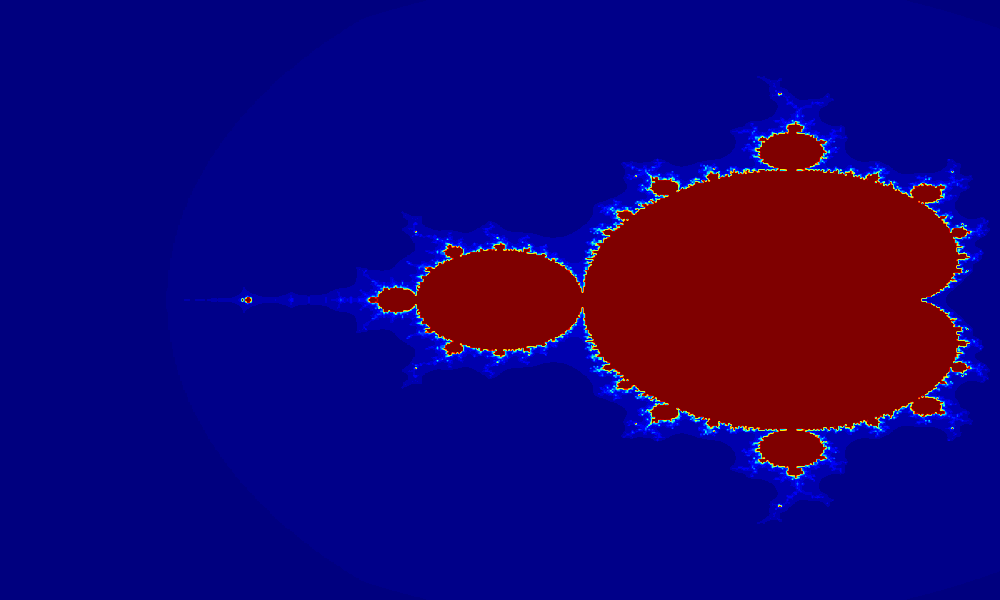

In [32]:
# xmin=-1.03,
# xmax=-1.025, 
# ymin=-0.363, 
# ymax=-0.358, 

create_zoom_gif((-2.5, 0.5, -1.5, 1.5), (-1.03, -1.025, -0.363, -0.358), 30, 'mandelbrot_zoom.gif')

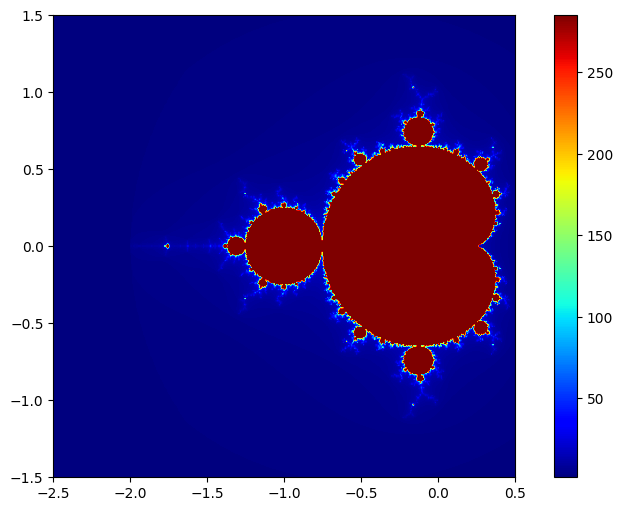

In [5]:
plot_mandelbrot(
    xmin=-2.5, 
    xmax=0.5, 
    ymin=-1.5, 
    ymax=1.5, 
    max_iter=256, 
    width=600, 
    height=400,
)

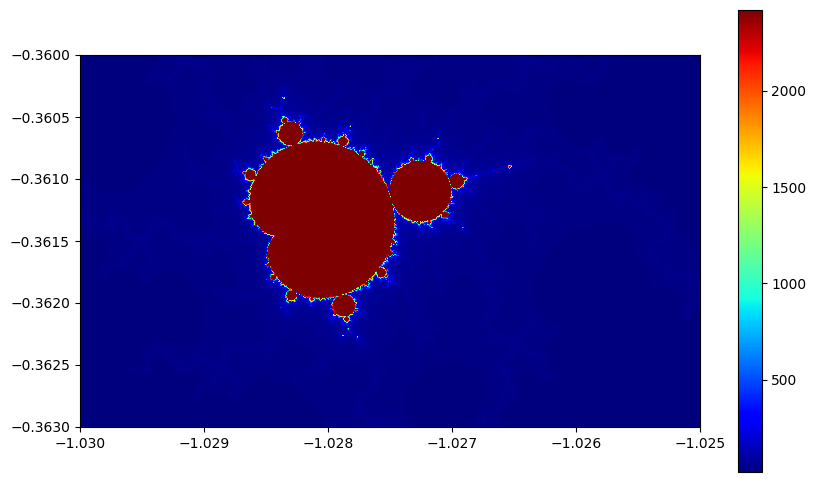

In [33]:
    # xmin=-1.415, 
    # xmax=-1.42, 
    # ymin=-0.002, 
    # ymax=0.002, 

plot_mandelbrot(
    xmin=-1.03,
    xmax=-1.025, 
    ymin=-0.363, 
    ymax=-0.360, 
    max_iter=256, 
    width=600, 
    height=400,
)